# 如何分析Facebook粉絲頁資料並匯出excel報表？
接下來會以前面爬下來的蘋果日報粉絲頁當作本文範例  

使用套件  
**pandas** : 在做資料分析的時候,通常都會把資料轉成pandas中DataFrame,因為可以快速有效地處理這些資料(統計,過濾,分組...)  
**matplotlib** : python中最著名的繪圖套件,可以很輕易地畫出各種分析統計圖表  
**seaborn** : 在matplotlib更強大方便的繪圖套件,提供更高階的API(用matplotlib要設定比較多,自由度較高,seaborn自由度沒那麼高,但比較易用)  

In [1]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 讀取粉絲頁posts
page_id = "appledaily.tw"

path = 'post/'+page_id+'_post.csv'

In [3]:
df = pd.read_csv(path, encoding = 'utf8')

來看看資料的前5筆

In [4]:
df.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,232633627068_10155689734022069,加油！放寬心才能走出來\n \n#金曲男星 #蛋堡 #邱振熙 蛋堡 Soft Lipa,【壹週刊】​金曲男星進精神療養院 曾入圍歌王,link,https://www.facebook.com/232633627068/posts/10...,2017-03-14 18:20:02,275,3,0,240,13,14,3,4,1
1,232633627068_10155689752042069,#最新 趕快清查把該抓的抓起來！\n \n相關→ 自殺副局長12年前與晶鑽搭上線 多次提供開...,【晶鑽弊案】北市高官也涉貪 建管處前主秘遭搜索約談,link,https://www.facebook.com/232633627068/posts/10...,2017-03-14 17:59:25,157,8,0,141,3,2,7,0,4
2,232633627068_10155689484782069,#慎入 這就跟把雞排放進我嘴裡又不讓我咬一樣呀...... #宅編\n \n完整 #動新聞...,【大咬片】馴獸師把頭放進鱷魚嘴 被咬得血流滿面,video,https://www.facebook.com/232633627068/posts/10...,2017-03-14 17:50:00,269,24,4,210,4,29,24,2,0
3,232633627068_10155689727032069,距離周末前往台中還有...好久 #隨編\n \n#正妹 #紅豆餅妹 #朝聖啦 #蕭卉君 \n...,清新紅豆餅妹藏逆天「胸器」！網友揪朝聖啦,link,https://www.facebook.com/232633627068/posts/10...,2017-03-14 17:40:00,2904,109,144,2802,38,44,18,1,1
4,232633627068_10155689539617069,Betty批「這種人根本不配當攝影師，很沒道德」\n \n【完整 #動新聞】大尺度女模控無...,大尺度女模控無良攝影師 外流露點走光照,video,https://www.facebook.com/232633627068/posts/10...,2017-03-14 17:30:00,595,18,7,496,8,21,4,2,64


要如何找到這則在FB上的post呢？  
可以透過status_link去找回這則po文 

In [5]:
df['status_link'][0]

'https://www.facebook.com/232633627068/posts/10155689734022069'

 ![title](https://raw.githubusercontent.com/wutienyang/facebook_fanpage_analysis/master/image/Selection_013.png)

處理前總共5234筆

In [6]:
len(df)

5234

把這些過濾掉,並且重新做reindex,原因是因為內建過濾的時候,它的index是不會改變的

In [7]:
df = df[(df['num_reactions']!=0) & (df['status_message'].notnull())].reindex()

處理後剩下5061筆,總共過濾掉了173筆

In [8]:
len(df)

5061

### 處理日期和新增星期,小時
先處理日期,由於讀入的是string,先轉成datatime的object  
就可以再取出星期(發文星期)和小時(單日發文時段)

In [9]:
df['datetime'] = df['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['weekday'] = df['datetime'].apply(lambda x: x.weekday_name)
df['hour'] = df['datetime'].apply(lambda x:  x.hour)

### reactions隨時間變化趨勢圖
由於臉書在2016年有更新,除了按讚(like),還多了loves,wows,hahas,sads,angry,而reaction就是全部的總和  
該篇post總共得到多少回應(reaction)  
x軸是時間,y軸是likes,loves,wows,hahas,sads,angry的數目,可以看出隨時間變化的各個趨勢  
  
2017年看得出來很用心在經營,2014似乎有空窗期

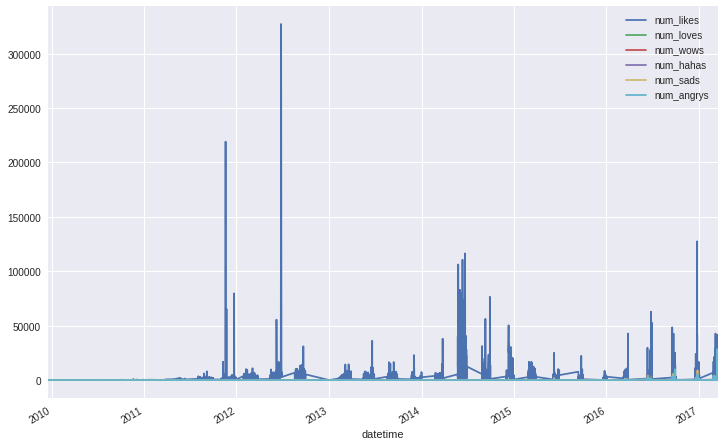

In [10]:
df.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

### 按讚,留言,分享隨時間變化趨勢圖
x軸是時間,y軸是reactions,comments,wows,shares的數目,可以看出隨時間變化的按讚,留言,分享的趨勢  

2016有數次綠色高於其他顏色,也就是說留言數大於反應和分享,推測可能是留言送禮的post吧

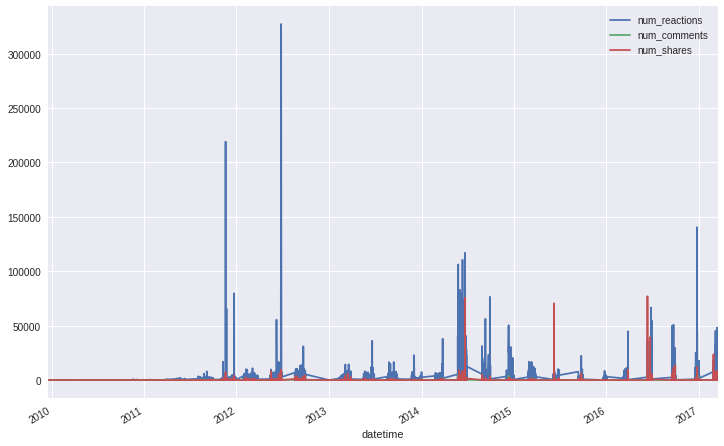

In [11]:
df.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

### 發文頻率統計
統計每個post的發布時間間隔,就可以了解發文的頻率  

雖然平均的發文頻率是12小時,但是看四分位數,前四分之一是半小時,前四分之三是五小時,  
表示發文是非常頻繁的,一天好幾po文,至於平均數和標準差會這麼大,推測是初期經營臉書的發文頻率過低的影響  
被前期的outlier影響

In [12]:
import datetime
delta_datetime = df['datetime'].shift(1) - df['datetime']
delta_datetime_df = pd.Series(delta_datetime).describe().apply(str)
delta_datetime_df = delta_datetime_df.to_frame(name='frequent of posts')
delta_datetime_df

,frequent of posts
count,5060
mean,0 days 12:32:28.770948
std,4 days 04:52:57.114191
min,0 days 00:00:00
25%,0 days 00:30:00
50%,0 days 01:31:26
75%,0 days 05:28:11.750000
max,92 days 14:58:32


### 處理星期和小時
要重新創造DataFrame,理由有兩個  
第一個 - 假設某個時間是0的話,要填上0  
第二個 - key要按照順序,畫圖時才會是周一到週五,不然會順序會亂掉  

In [13]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [14]:
df_weekday = weekday(dict(df['weekday'].value_counts()))
df_weekday

,index,weekday
0,Monday,730
1,Tuesday,756
2,Wednesday,722
3,Thursday,752
4,Friday,766
5,Saturday,697
6,Sunday,638


### 星期幾發文數目統計長條圖
看起來星期日較少發文

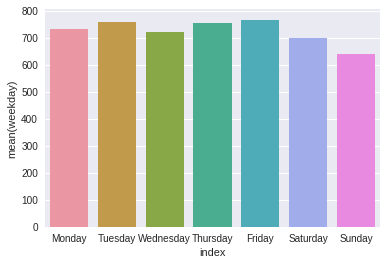

In [15]:
sns.barplot(x='index', y='weekday', data = df_weekday)

In [16]:
def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [17]:
df_hour = hour(dict(df['hour'].value_counts()))
df_hour

,index,hour
0,0,179
1,1,135
2,2,94
3,3,56
4,4,46
5,5,52
6,6,82
7,7,84
8,8,143
9,9,238


### 單日第幾時發文數目統計長條圖
看這發文的曲線,小編真難當,晚上凌晨,一大清早還是要發文

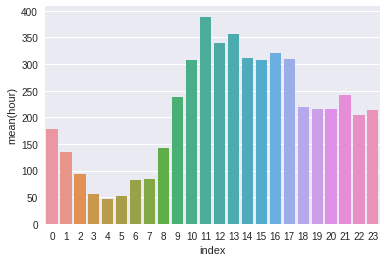

In [18]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

In [19]:
df_status_type = df['status_type'].value_counts().to_frame(name='status_type')
df_status_type

,status_type
photo,1807
link,1695
video,1495
status,64


### 發文種類數目統計長條圖
最喜歡的發文形式是圖片,再來是分享連結和影片

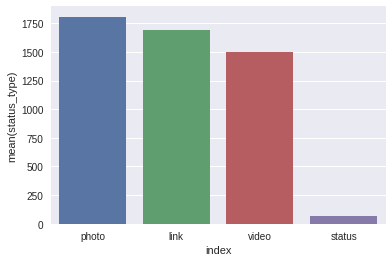

In [20]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

### 發文種類散佈圖
單一個點代表該發文是什麼種類和得到多少reaction,photo發文的reaction在0-50000最為密集

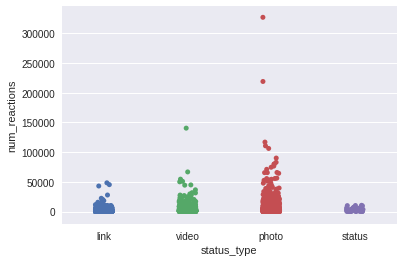

In [21]:
sns.stripplot(x="status_type", y="num_reactions", data=df, jitter=True)

### 星期幾發文散佈圖
單一個點代表該post是什麼種類和得到多少reaction

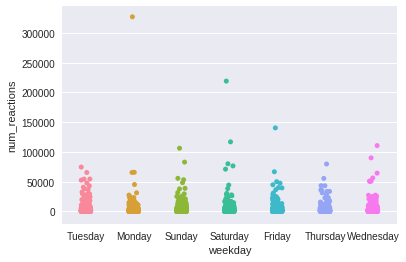

In [22]:
sns.stripplot(x="weekday", y="num_reactions", data=df, jitter=True)

### 單日第幾時發文散佈圖
單一個點代表該post是什麼種類和得到多少reaction

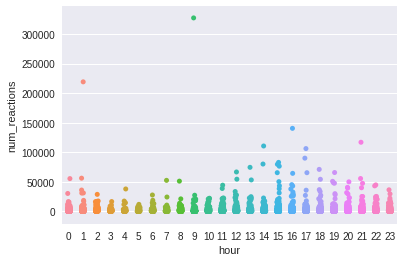

In [23]:
sns.stripplot(x="hour", y="num_reactions", data=df, jitter=True)

### 各個不同發文類型的reaction長條圖

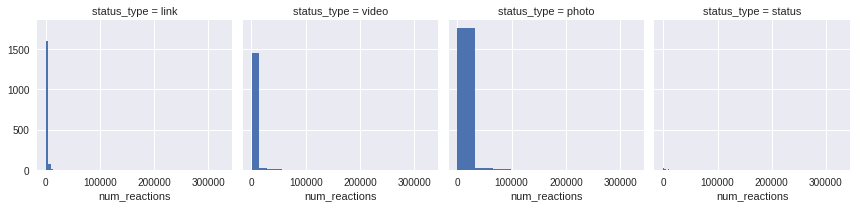

In [24]:
g = sns.FacetGrid(df, col="status_type")
g.map(plt.hist, "num_reactions")

如果我們想看不同reaction間的關係就需要用到Pearson Correlation: 主要衡量兩變數間線性關聯性的高低程度  
由此圖我們可以得知reaction之間的相關性都不高

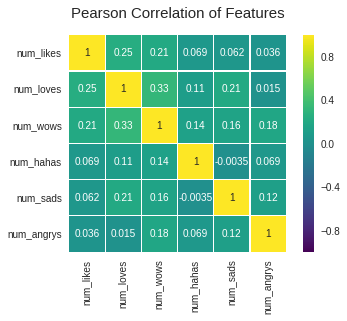

In [25]:
df_reaction = df[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
colormap = plt.cm.viridis
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_reaction.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

share和comment相關性較高,留言和分享的人數相關性比留言和reaction的人數相關性高

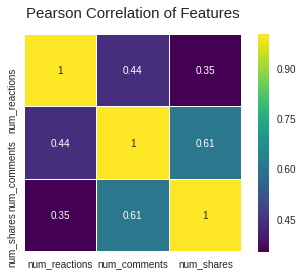

In [26]:
df_tmp = df[['num_reactions', 'num_comments', 'num_shares']]
colormap = plt.cm.viridis
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_tmp.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## 分析post中的文字
需要用到jieba!  
jieba是一個強大的中文斷詞程式,可以幫你去分析你要分析的文本內容  
wordcloud 則是畫文字雲的套件

In [27]:
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud

# 安裝jieba套件的時候,就有繁體詞庫
jieba.set_dictionary('/home/wy/anaconda3/envs/python3/lib/python3.6/site-packages/jieba/extra_dict/dict.txt.big')

### 先介紹一下jieba的使用
一般使用jieba分詞呼叫的api jieba.cut 而本文則是使用 jieba.analyse.extract_tags(基於 TF-IDF算法關鍵詞抽取)  
原因在於透過TF-IDF評估單詞對於文件的集合或詞庫中一份文件的重要程度,就可以過濾掉不重要的字,看以下範例 : 

In [28]:
list(df['status_message'])[99]

'可惜棒協秘書長林宗成沒到現場，否則今晚這場Lamigo對棒協之戰應該會火花四射......\n\u3000\n#劉玠廷 #錢定遠 #林宗成 #中華職棒 #棒協 #WBC #Lamigo #lamigo桃猿 \nLamigo Monkeys 中華民國棒球協會粉絲團\n棒協要改革，國球自己救'

In [29]:
for one in jieba.cut(list(df['status_message'])[99]):
    print (one)

Building prefix dict from /home/wy/anaconda3/envs/python3/lib/python3.6/site-packages/jieba/extra_dict/dict.txt.big ...
Loading model from cache /tmp/jieba.ue56a5cc1e0fa654d6fb1c49f7279c0f2.cache
Loading model cost 1.293 seconds.
Prefix dict has been built succesfully.


可惜
棒協
秘書長
林宗成
沒到
現場
，
否則
今晚
這場
Lamigo
對棒
協之戰
應該
會
火花
四射
......


　


#
劉
玠
廷
 
#
錢
定遠
 
#
林宗成
 
#
中華
職棒
 
#
棒協
 
#
WBC
 
#
Lamigo
 
#
lamigo
桃猿
 


Lamigo
 
Monkeys
 
中華民國
棒球
協會
粉絲團


棒
協要
改革
，
國球
自己
救


In [30]:
jieba.analyse.extract_tags(list(df['status_message'])[99], topK=120)

['Lamigo',
 '棒協',
 '林宗成',
 '秘書長',
 '沒到',
 '現場',
 '否則',
 '這場',
 '對棒',
 '協之戰',
 '應該',
 '......',
 '定遠',
 '中華',
 '職棒',
 'WBC',
 'lamigo',
 '桃猿',
 'Monkeys',
 '中華民國',
 '協會',
 '粉絲團',
 '協要',
 '國球',
 '棒球',
 '四射',
 '火花',
 '今晚',
 '可惜',
 '改革',
 '自己']

因此我們可以把每一篇發文的內容透過jieba的關鍵字抽取,抽取出重要的字  
然後統計這些字出現的頻率,並使用WordCloud畫成文字雲

In [31]:
def jieba_extract(message_list):
    word_count = {}
    for message in message_list:
        # 在抽取關鍵字時,可能會發生錯誤,先把錯誤的message收集起來,看看是怎麼一回事
        seg_list = jieba.analyse.extract_tags(message, topK=120)
        for seg in seg_list:
            if not seg in word_count:
                word_count[seg] = 1
            else:
                word_count[seg] += 1

    sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1))
    sorted_word_count.reverse()
    return sorted_word_count
sorted_word_count = jieba_extract(list(df['status_message']))

看一下最常出現在post的字前十名是啥

In [32]:
print (sorted_word_count[:10])

[('http', 3075), ('com', 3071), ('tw', 3058), ('appledaily', 2858), ('article', 2813), ('www', 2581), ('realtimenews', 1730), ('新聞', 1622), ('報導', 1153), ('圖文', 1111)]


出現文字雲！ 文字雲其實還有蠻多可以調整的,甚至可以把圖片填滿字,請參考  [wordcloud](https://github.com/amueller/word_cloud)  
會出現http com www 是因為每篇發文都會有link連結,所以就把link連結解析出來了

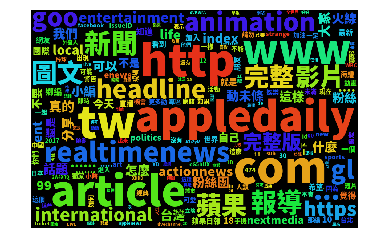

In [33]:
tpath = '/home/wy/font/NotoSansCJKtc-Black.otf'
wordcloud = WordCloud(max_font_size=120, relative_scaling=.1, width=900, height=600, font_path=tpath).fit_words(sorted_word_count)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

所以我們把前30名頻率高的拿掉在畫文字雲  
sorted_word_count[30:]

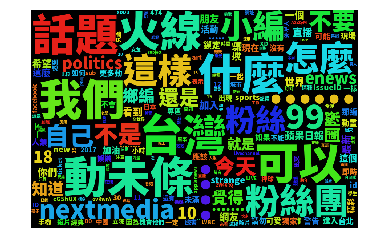

In [34]:
tpath = '/home/wy/font/NotoSansCJKtc-Black.otf'
wordcloud = WordCloud(max_font_size=120, relative_scaling=.1, width=900, height=600, font_path=tpath).fit_words(sorted_word_count[30:])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# comments

In [35]:
# 讀入comment csv
c_path = path = 'comment/'+page_id+'_comment.csv'
c_df = pd.read_csv(c_path)

/home/wy/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
c_df.head()

,comment_id,status_id,parent_id,comment_message,comment_author,comment_published,comment_likes
0,10155677962322069_10155678009367069,232633627068_10155677962322069,NaN,所以中國只有共產黨永遠不會民主,Yi-shiau Shih,11/3/2017 10:42,3.0
1,10155677962322069_10155678009597069,232633627068_10155677962322069,NaN,抓起來 叫獄友肛他,傅仁緯,11/3/2017 10:42,0.0
2,10155677962322069_10155678011737069,232633627068_10155677962322069,NaN,聽你狗養的裝蒜 當學生的時候 行為舉止這麼異常 被逮到現在再裝死是吧?,東雲,11/3/2017 10:44,0.0
3,10155677962322069_10155678012617069,232633627068_10155677962322069,NaN,台灣的共產黨就國民黨丫，不然咧 ?,Tim Shen,11/3/2017 10:44,0.0
4,10155677962322069_10155678013017069,232633627068_10155677962322069,NaN,原來他是來學習機密要回去推翻共產黨，看來他偏綠黨。,楊淑華,11/3/2017 10:44,1.0


In [37]:
c_df = c_df[c_df['comment_message'].notnull()].reindex()

[('...', 29714), ('什麼', 24179), ('不是', 23464), ('可以', 21547), ('真的', 21539), ('自己', 20354), ('台灣', 19266), ('就是', 18005), ('這樣', 17303), ('不要', 17108)]


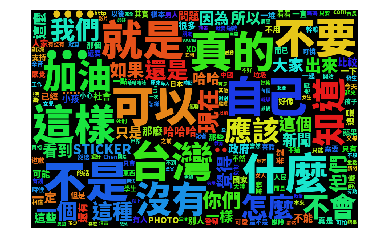

In [38]:
sorted_comment_message = jieba_extract(list(c_df['comment_message']))
print (sorted_comment_message[:10])
tpath = '/home/wy/font/NotoSansCJKtc-Black.otf'
wordcloud = WordCloud(max_font_size=120, relative_scaling=.1, width=900, height=600, font_path=tpath).fit_words(sorted_comment_message)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
c_df = c_df[c_df['comment_author'].notnull()].reindex()

In [40]:
def word_count(data_list):
    d = {}
    for one in data_list:
        if one not in d:
            d[one] = 1
        else:
            d[one] += 1
    return d

[('蘋果日報', 1122), ('高挺珍', 479), ('Teng Ting Tsai', 408), ('陳義中', 297), ('Yu-Wei Chuang', 280), ('郭彼得', 265), ('陳威羽', 265), ('李嘉明', 248), ('莊永吉', 238), ('David Yang', 230)]


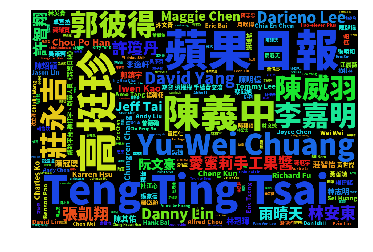

In [41]:
d = word_count(list(c_df['comment_author']))
comment_authors = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
print (comment_authors[:10])
tpath = '/home/wy/font/NotoSansCJKtc-Black.otf'
wordcloud = WordCloud(max_font_size=120, relative_scaling=.1, width=900, height=600, font_path=tpath).fit_words(comment_authors)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 輸出excel報表
當我們在上面做了許多分析，那能不能把這些分析都輸成excel報表！？  
用python輸出excel就靠它了 [xlsxwriter](https://xlsxwriter.readthedocs.io/index.html) ！  

In [42]:
import xlsxwriter

我們先用pandas中的describe (Generate various summary statistics),去統計該欄位的平均數,中位數,標準差,四分位數...

In [43]:
df_num_reactions = df['num_reactions'].describe().to_frame(name='reactions')
df_num_reactions

,reactions
count,5061.000000
mean,3151.130409
std,8860.404063
min,1.000000
25%,558.000000
50%,1243.000000
75%,3049.000000
max,327177.000000


In [44]:
df_num_comments = df['num_comments'].describe().to_frame(name='comments')
df_num_comments

,comments
count,5061.000000
mean,126.283343
std,474.669910
min,0.000000
25%,24.000000
50%,55.000000
75%,120.000000
max,23483.000000


In [45]:
df_num_shares = df['num_shares'].describe().to_frame(name='shares')
df_num_shares

,shares
count,5061.000000
mean,238.853191
std,2028.834987
min,0.000000
25%,6.000000
50%,37.000000
75%,129.000000
max,77038.000000


然後把這些DataFrame寫入xlsx  
官網介紹 ： [Working with Python Pandas and XlsxWriter](https://xlsxwriter.readthedocs.io/working_with_pandas.html)  

## xlsxwriter 調整位置
當你在寫入excel的時候，需要設定你要寫入的位置 :  
  
第一種 : 把DataFrame寫入到xlsx  
```
df_num_reactions.to_excel(writer, sheet_name=page_id, startcol=0, startrow=0)
```
startcol,startrow : 像座標的形式  
sheet_name : 工作表  
___
第二種繪製內建圖表 : 
```
chart1.add_series({
    'categories': '='+page_id+'!$A$13:$A$18',
    'values': '='+page_id+'!$B$13:$B$18',
})
```
categories : name來自A13-A18  
values : value來自B13-B18  
___
第三種插入圖表 :   
```
worksheet.insert_image('L12', 'image/image1.png')
```
'L12' : 插入位置  
'image/image1.png' : 圖片路徑
![title](https://raw.githubusercontent.com/wutienyang/facebook_fanpage_analysis/master/image/Selection_015.png)

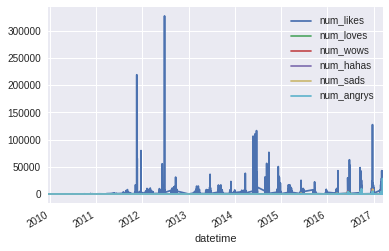

In [46]:
# 設定路徑
excel_path = 'excel/'+page_id+'_analysis.xlsx'
writer = pd.ExcelWriter(excel_path, engine='xlsxwriter')

# 把DataFrame寫入到xlsx
df_num_reactions.to_excel(writer, sheet_name=page_id, startcol=0, startrow=0)
df_num_comments.to_excel(writer, sheet_name=page_id, startcol=3, startrow=0)
df_num_shares.to_excel(writer, sheet_name=page_id, startcol=6, startrow=0)
delta_datetime_df.to_excel(writer, sheet_name=page_id, startcol=9, startrow=0)

df_status_type.to_excel(writer, sheet_name=page_id, startcol=0, startrow=11)
df_weekday.set_index('index').to_excel(writer, sheet_name=page_id, startcol=0, startrow=25)
df_hour.set_index('index').to_excel(writer, sheet_name=page_id, startcol=0, startrow=39)


# 畫出內建長條圖
workbook  = writer.book

# 發文種類長條統計圖
chart1 = workbook.add_chart({'type': 'column'})
chart1.add_series({
    'categories': '='+page_id+'!$A$13:$A$18',
    'values': '='+page_id+'!$B$13:$B$18',
})
chart1.set_title ({'name': '發文種類長條統計圖'})
chart1.set_x_axis({'name': 'status_type'})
chart1.set_y_axis({'name': 'count'})
worksheet = writer.sheets[page_id]
worksheet.insert_chart('D12', chart1)

# 星期幾發文統計長條圖
chart2 = workbook.add_chart({'type': 'column'})
chart2.add_series({
    'categories': '='+page_id+'!$A$27:$A$33',
    'values': '='+page_id+'!$B$27:$B$33',
})
chart2.set_title ({'name': '星期幾發文統計長條圖'})
chart2.set_x_axis({'name': 'hour'})
chart2.set_y_axis({'name': 'count'})
worksheet = writer.sheets[page_id]
worksheet.insert_chart('D26', chart2)

# 單日幾時發文統計長條圖
chart3 = workbook.add_chart({'type': 'column'})
chart3.add_series({
    'categories': '='+page_id+'!$A$41:$A$64',
    'values': '='+page_id+'!$B$41:$B$64',
})
chart3.set_title ({'name': '單日幾時發文統計長條圖'})
chart3.set_x_axis({'name': 'weekday'})
chart3.set_y_axis({'name': 'count'})
worksheet = writer.sheets[page_id]
worksheet.insert_chart('D40', chart3)

# 示範插入image, 當把上面的圖畫出來之後,要先存起來才能插入到xlsx
df.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'])
plt.savefig('image/image1.png')
worksheet.insert_image('L12', 'image/image1.png')

由於會把太瑣碎的資料都寫到excel裡面，就不把全部分析的資料都寫進去   
想要了解更多繪製內建圖表的方法就到 [xlsxwriter](https://xlsxwriter.readthedocs.io/index.html) 去看吧~